<a href="https://colab.research.google.com/github/springboardmentor891v/CreditPathAI/blob/Rajath/microsoft_notebooks/eda_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA REPORT**

In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your files in Google Drive
drive_path = '/content/drive/MyDrive/'

# List of files to copy
files_to_copy = [
    'Borrower.txt',
    'Borrower_Prod.txt',
    'Loan.txt',
    'Loan_Prod.txt'
]

# Destination directory in Colab
colab_path = '/content/'

# Copy files from Drive to Colab
for file_name in files_to_copy:
    source_path = os.path.join(drive_path, file_name)
    destination_path = os.path.join(colab_path, file_name)
    if os.path.exists(source_path):
        !cp "{source_path}" "{destination_path}"
        print(f"Copied {file_name} to {colab_path}")
    else:
        print(f"File not found in Drive: {file_name}")

# Verify the files are in the Colab environment
print("\nFiles in Colab environment:")
!ls /content/

Mounted at /content/drive
Copied Borrower.txt to /content/
Copied Borrower_Prod.txt to /content/
Copied Loan.txt to /content/
Copied Loan_Prod.txt to /content/

Files in Colab environment:
Borrower_Prod.txt  Borrower.txt  drive	Loan_Prod.txt  Loan.txt  sample_data


In [2]:
import pandas as pd
df_borrower = pd.read_csv("Borrower.txt", sep="\t")
df_loan=pd.read_csv("Loan.txt",sep='\t')
df_borrower_prod = pd.read_csv("Borrower_Prod.txt", sep="\t")
df_loan_prod=pd.read_csv("Loan_Prod.txt",sep='\t')

In [3]:
df_borrower
#df_loan


,memberId,residentialState,yearsEmployment,homeOwnership,annualIncome,incomeVerified,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,numOpenCreditLines1Year,revolvingBalance,revolvingUtilizationRate,numDerogatoryRec,numDelinquency2Years,numChargeoff1year,numInquiries6Mon
0,2305095,NM,10+ years,rent,56471,1,16.80,6,11,9.0,6,14301,49.02,0,19,10,0
1,2610493,WA,2-5 years,rent,55038,0,19.99,22,8,7.0,4,18262,72.40,1,0,0,0
2,2491679,MS,< 1 year,rent,56610,1,14.33,5,8,5.0,5,10799,66.27,0,1,1,0
3,2092798,TX,6-9 years,own,54887,1,14.80,12,14,7.0,3,15272,61.05,1,0,0,3
4,2633077,MA,2-5 years,rent,53522,1,10.14,4,21,19.0,10,19316,56.39,2,14,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2069462,LA,2-5 years,own,58987,0,21.62,2,16,10.0,8,15113,77.01,0,6,5,18
99996,2218175,MO,6-9 years,rent,54245,1,15.60,11,11,7.0,4,13504,80.18,0,0,0,1
99997,2262127,DE,1 year,rent,54923,0,13.96,2,21,13.0,10,18108,77.28,0,0,0,1
99998,2501174,CA,1 year,own,57809,1,9.07,36,18,12.0,4,17918,61.01,10,0,0,1


In [4]:
df_loan

,loanId,memberId,date,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
0,1888978,2305095,12/10/2014,debtconsolidation,0.0,25190.0,60 months,6.25,490,E3,Current
1,1299695,2610493,9/15/2014,debtconsolidation,0.0,21189.0,60 months,10.49,455,B3,Current
2,1875016,2491679,9/11/2014,debtconsolidation,0.0,29908.0,60 months,9.11,622,B2,Current
3,1440478,2092798,4/22/2016,homeimprovement,0.0,13053.0,48 months,11.89,343,B3,Current
4,1124634,2633077,2/3/2016,debtconsolidation,0.0,24613.0,60 months,15.13,587,A3,Current
...,...,...,...,...,...,...,...,...,...,...,...
99995,1208167,2069462,5/25/2016,debtconsolidation,0.0,25874.0,60 months,10.95,562,A2,Current
99996,1097349,2218175,6/5/2015,debtconsolidation,0.0,18557.0,60 months,5.31,353,A1,Current
99997,1873914,2262127,11/13/2014,debtconsolidation,0.0,15877.0,36 months,9.87,511,A2,Current
99998,1572282,2501174,6/6/2015,debtconsolidation,0.0,15601.0,60 months,7.31,311,C3,Current


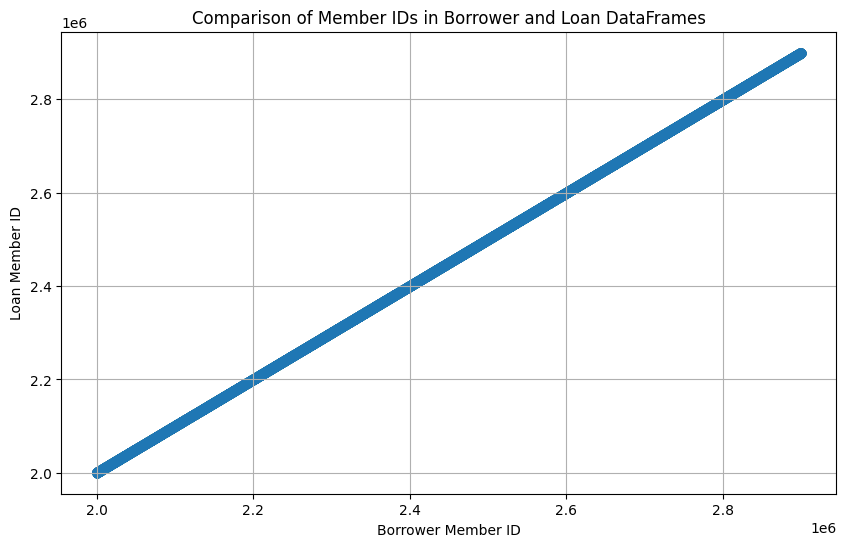


Number of common member IDs: 100000
Number of member IDs only in borrower dataframe: 0
Number of member IDs only in loan dataframe: 0


In [5]:
import matplotlib.pyplot as plt

# Check if the lengths of memberId columns are the same
if len(df_borrower['memberId']) != len(df_loan['memberId']):
    print("Warning: The number of memberIds in borrower and loan dataframes are different.")

# Create a scatter plot to visualize the relationship between memberIds in both dataframes
plt.figure(figsize=(10, 6))
plt.scatter(df_borrower['memberId'], df_loan['memberId'], alpha=0.5)
plt.xlabel('Borrower Member ID')
plt.ylabel('Loan Member ID')
plt.title('Comparison of Member IDs in Borrower and Loan DataFrames')
plt.grid(True)
plt.show()

# You can also use a more robust method to check for exact matches and differences
# Check for exact matches
common_member_ids = set(df_borrower['memberId']).intersection(set(df_loan['memberId']))
print(f"\nNumber of common member IDs: {len(common_member_ids)}")

# Check for member IDs only in borrower dataframe
borrower_only_ids = set(df_borrower['memberId']) - set(df_loan['memberId'])
print(f"Number of member IDs only in borrower dataframe: {len(borrower_only_ids)}")

# Check for member IDs only in loan dataframe
loan_only_ids = set(df_loan['memberId']) - set(df_borrower['memberId'])
print(f"Number of member IDs only in loan dataframe: {len(loan_only_ids)}")

In [6]:
# Check for duplicate memberId in df_loan
duplicate_loan_member_ids = df_loan[df_loan.duplicated('memberId', keep=False)]

if not duplicate_loan_member_ids.empty:
    print("There are duplicate member IDs in the df_loan DataFrame.")
    print("Here are the rows with duplicate member IDs:")
    display(duplicate_loan_member_ids.sort_values(by='memberId'))
else:
    print("There are no duplicate member IDs in the df_loan DataFrame.")

There are no duplicate member IDs in the df_loan DataFrame.


In [7]:
# Check for duplicate memberId in df_borrower
duplicate_borrower_member_ids = df_borrower[df_borrower.duplicated('memberId', keep=False)]

if not duplicate_borrower_member_ids.empty:
    print("There are duplicate member IDs in the df_borrower DataFrame.")
    print("Here are the rows with duplicate member IDs:")
    display(duplicate_borrower_member_ids.sort_values(by='memberId'))
else:
    print("There are no duplicate member IDs in the df_borrower DataFrame.")

There are no duplicate member IDs in the df_borrower DataFrame.


In [8]:
df_borrower_prod

,memberId,residentialState,yearsEmployment,homeOwnership,annualIncome,incomeVerified,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,numOpenCreditLines1Year,revolvingBalance,revolvingUtilizationRate,numDerogatoryRec,numDelinquency2Years,numChargeoff1year,numInquiries6Mon
0,16334480,IL,6-9 years,mortgage,50975,0,17.71,1,11,9,5,15868,83.01,0,9,5,10
1,16334481,TN,2-5 years,own,51887,1,23.84,5,19,16,12,12709,65.63,0,0,0,1
2,16334482,PA,10+ years,mortgage,53254,1,22.53,2,22,19,12,16928,78.35,0,0,0,1
3,16334483,TX,1 year,own,59643,1,15.26,6,13,7,6,17301,61.74,0,0,0,0
4,16334484,CA,< 1 year,mortgage,60630,1,9.67,4,16,15,10,16655,64.82,0,0,0,0
5,16334485,NY,10+ years,rent,49207,1,18.09,7,16,16,14,15089,62.79,0,0,0,8
6,16334486,CA,< 1 year,rent,54070,1,21.47,3,19,11,4,15801,70.65,0,0,0,2
7,16334487,MD,< 1 year,rent,53539,1,24.42,38,18,13,8,14789,74.11,0,0,0,0
8,16334488,KY,10+ years,own,52252,0,13.04,5,25,22,16,11624,96.96,4,0,0,3
9,16334489,DC,< 1 year,mortgage,50263,0,15.75,6,18,13,7,11572,44.55,0,0,0,0


In [9]:
df_loan.columns

Index(['loanId', 'memberId', 'date', 'purpose', 'isJointApplication',
       'loanAmount', 'term', 'interestRate', 'monthlyPayment', 'grade',
       'loanStatus'],
      dtype='object')

In [10]:
df_borrower.columns

Index(['memberId', 'residentialState', 'yearsEmployment', 'homeOwnership',
       'annualIncome', 'incomeVerified', 'dtiRatio', 'lengthCreditHistory',
       'numTotalCreditLines', 'numOpenCreditLines', 'numOpenCreditLines1Year',
       'revolvingBalance', 'revolvingUtilizationRate', 'numDerogatoryRec',
       'numDelinquency2Years', 'numChargeoff1year', 'numInquiries6Mon'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Check for common and unique memberIds
common_borrower_prod_ids = set(df_borrower['memberId']).intersection(set(df_borrower_prod['memberId']))
borrower_only_ids = set(df_borrower['memberId']) - set(df_borrower_prod['memberId'])
borrower_prod_only_ids = set(df_borrower_prod['memberId']) - set(df_borrower['memberId'])

print(f"Number of common member IDs between df_borrower and df_borrower_prod: {len(common_borrower_prod_ids)}")
print(f"Number of member IDs only in df_borrower: {len(borrower_only_ids)}")
print(f"Number of member IDs only in df_borrower_prod: {len(borrower_prod_only_ids)}")

# Optional: Display some of the unique IDs if the number is small
if len(borrower_only_ids) < 20:
    print("\nSample member IDs only in df_borrower:", list(borrower_only_ids)[:5])
if len(borrower_prod_only_ids) < 20:
    print("Sample member IDs only in df_borrower_prod:", list(borrower_prod_only_ids)[:5])

# You can also check if the columns are the same
if list(df_borrower.columns) == list(df_borrower_prod.columns):
    print("\nColumns in df_borrower and df_borrower_prod are the same.")
else:
    print("\nColumns in df_borrower and df_borrower_prod are different.")
    print("Columns in df_borrower:", df_borrower.columns.tolist())
    print("Columns in df_borrower_prod:", df_borrower_prod.columns.tolist())

Number of common member IDs between df_borrower and df_borrower_prod: 0
Number of member IDs only in df_borrower: 100000
Number of member IDs only in df_borrower_prod: 22

Columns in df_borrower and df_borrower_prod are the same.


In [12]:
# Check for common columns between df_loan and df_borrower
common_columns = list(set(df_loan.columns).intersection(set(df_borrower.columns)))

if common_columns:
    print("Common columns between df_loan and df_borrower:")
    print(common_columns)
else:
    print("There are no common columns between df_loan and df_borrower.")

Common columns between df_loan and df_borrower:
['memberId']


In [13]:
# Merge df_borrower and df_loan using an inner join on 'memberId'
df = pd.merge(df_borrower, df_loan, on='memberId', how='inner')

# Display the first few rows of the merged dataframe
print("Merged DataFrame (first 5 rows):")
display(df.head())

# Display information about the merged dataframe
print("\nMerged DataFrame Info:")
df.info()

# Display the shape of the merged dataframe
print("\nShape of the merged DataFrame:")
print(df.shape)

Merged DataFrame (first 5 rows):


,memberId,residentialState,yearsEmployment,homeOwnership,annualIncome,incomeVerified,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,...,loanId,date,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
0,2305095,NM,10+ years,rent,56471,1,16.80,6,11,9.0,...,1888978,12/10/2014,debtconsolidation,0.0,25190.0,60 months,6.25,490,E3,Current
1,2610493,WA,2-5 years,rent,55038,0,19.99,22,8,7.0,...,1299695,9/15/2014,debtconsolidation,0.0,21189.0,60 months,10.49,455,B3,Current
2,2491679,MS,< 1 year,rent,56610,1,14.33,5,8,5.0,...,1875016,9/11/2014,debtconsolidation,0.0,29908.0,60 months,9.11,622,B2,Current
3,2092798,TX,6-9 years,own,54887,1,14.80,12,14,7.0,...,1440478,4/22/2016,homeimprovement,0.0,13053.0,48 months,11.89,343,B3,Current
4,2633077,MA,2-5 years,rent,53522,1,10.14,4,21,19.0,...,1124634,2/3/2016,debtconsolidation,0.0,24613.0,60 months,15.13,587,A3,Current



Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   memberId                  100000 non-null  int64  
 1   residentialState          100000 non-null  object 
 2   yearsEmployment           100000 non-null  object 
 3   homeOwnership             100000 non-null  object 
 4   annualIncome              100000 non-null  int64  
 5   incomeVerified            100000 non-null  int64  
 6   dtiRatio                  100000 non-null  float64
 7   lengthCreditHistory       100000 non-null  int64  
 8   numTotalCreditLines       100000 non-null  int64  
 9   numOpenCreditLines        99033 non-null   float64
 10  numOpenCreditLines1Year   100000 non-null  int64  
 11  revolvingBalance          100000 non-null  int64  
 12  revolvingUtilizationRate  100000 non-null  float64
 13  numDerogatoryRec     

In [14]:
display(df.isnull().sum())

,0
memberId,0
residentialState,0
yearsEmployment,0
homeOwnership,0
annualIncome,0
incomeVerified,0
dtiRatio,0
lengthCreditHistory,0
numTotalCreditLines,0
numOpenCreditLines,967


In [15]:
# Check for missing values in each column
print("Missing values in each column:")
display(df.isnull().sum())

Missing values in each column:


,0
memberId,0
residentialState,0
yearsEmployment,0
homeOwnership,0
annualIncome,0
incomeVerified,0
dtiRatio,0
lengthCreditHistory,0
numTotalCreditLines,0
numOpenCreditLines,967


In [16]:
# Check the unique values and their counts for each object (categorical) column
for col in df.select_dtypes(include='object').columns:
    print(f"Categories in column '{col}':")
    display(df[col].value_counts())
    print("-" * 30) # Separator for readability

Categories in column 'residentialState':


,count
residentialState,
CA,7057
FL,6603
DC,5396
NY,5161
WA,3477
TX,3432
IA,2975
IL,2913
ID,2845


------------------------------
Categories in column 'yearsEmployment':


,count
yearsEmployment,
10+ years,22389
6-9 years,19945
< 1 year,19401
1 year,19211
2-5 years,19054


------------------------------
Categories in column 'homeOwnership':


,count
homeOwnership,
mortgage,36187
rent,32797
own,31016


------------------------------
Categories in column 'date':


,count
date,
12/20/2015,162
12/15/2015,161
6/5/2015,160
4/18/2015,160
3/20/2016,160
...,...
3/13/2016,99
1/19/2015,98
2/17/2016,97


------------------------------
Categories in column 'purpose':


,count
purpose,
debtconsolidation,81344
homeimprovement,8116
other,4118
business,3210
healthcare,1229
education,1003
auto,980


------------------------------
Categories in column 'term':


,count
term,
60 months,33971
48 months,32486
36 months,32472


------------------------------
Categories in column 'grade':


,count
grade,
A1,11251
A2,10574
A3,10416
B1,8553
B3,8279
B2,8014
C1,7030
C2,6826
C3,5573


------------------------------
Categories in column 'loanStatus':


,count
loanStatus,
Current,89996
Default,10004


------------------------------


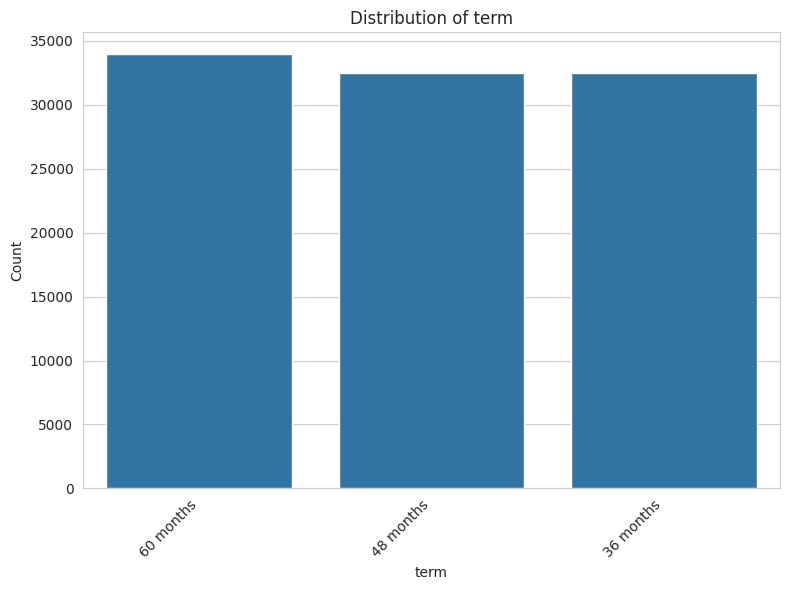

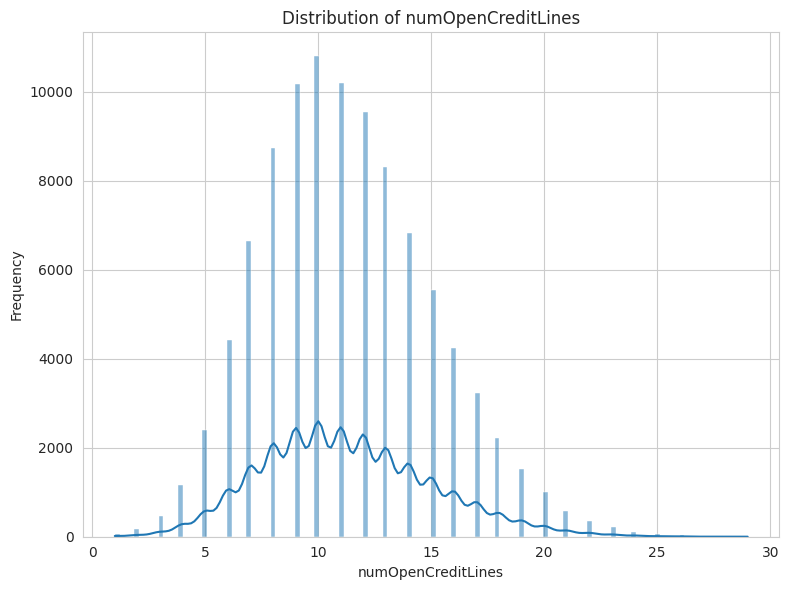

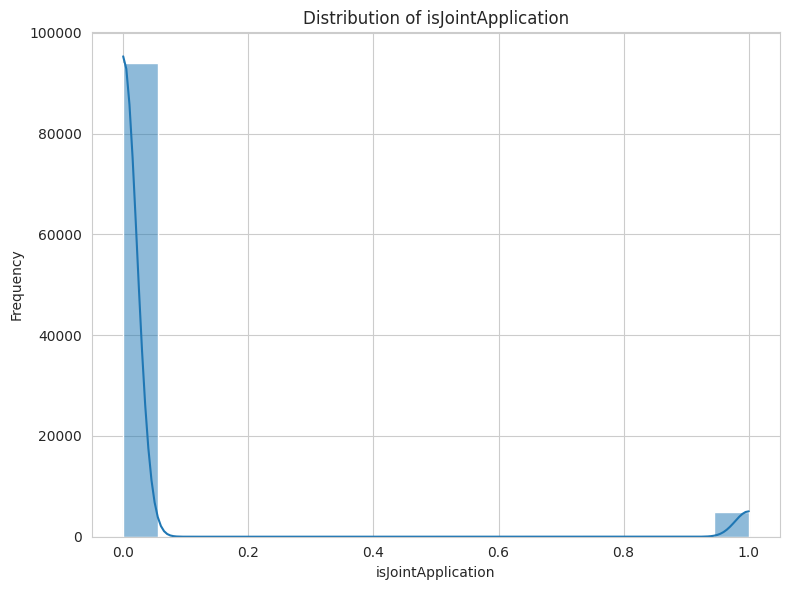

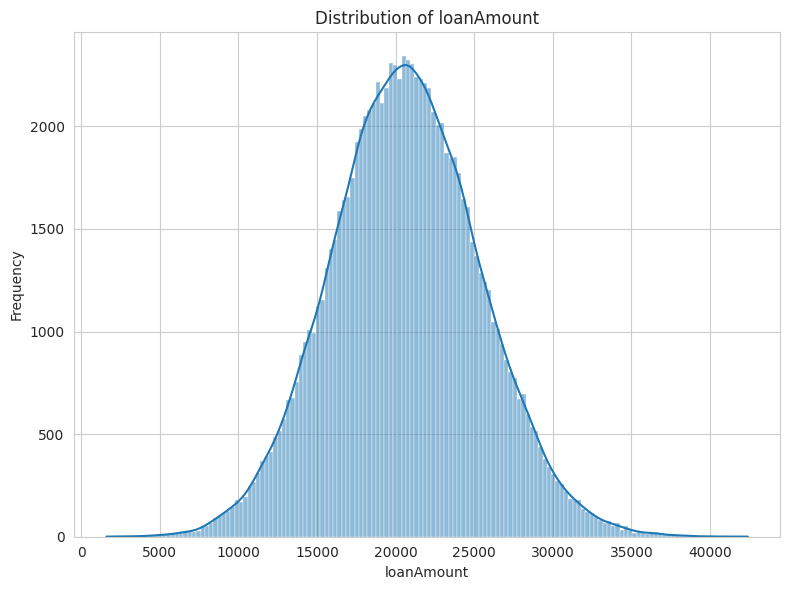

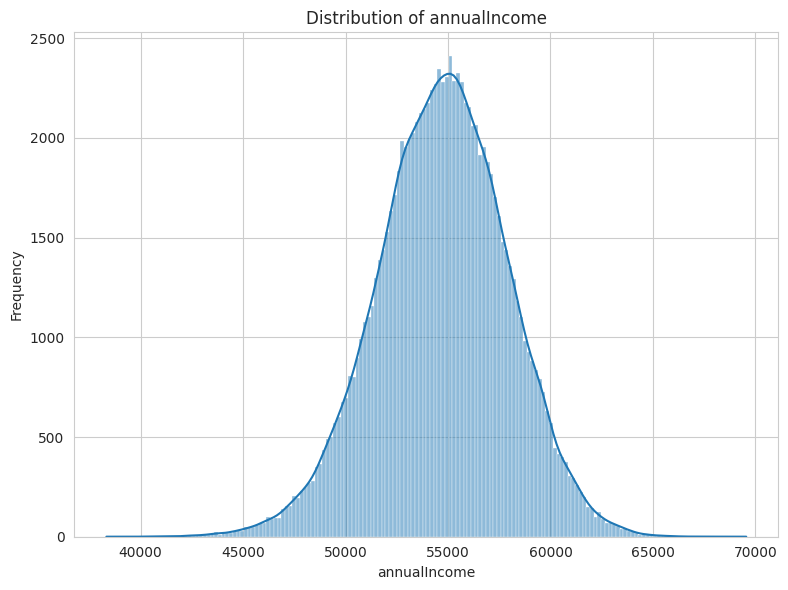

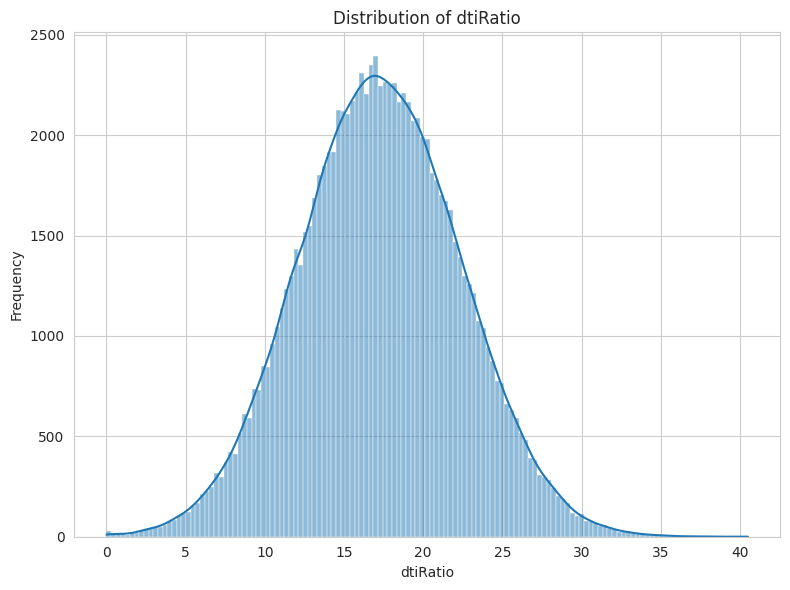

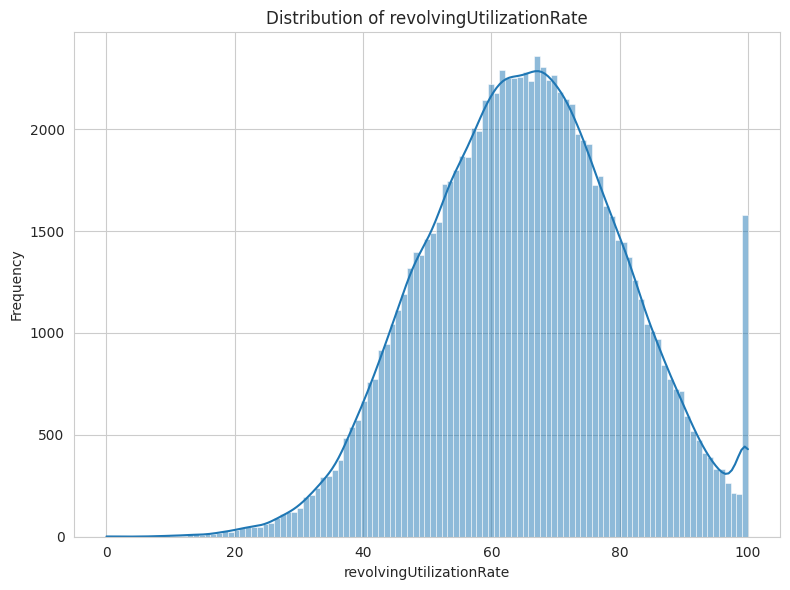

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
columns_to_visualize = ['term', 'numOpenCreditLines', 'isJointApplication', 'loanAmount', 'annualIncome', 'dtiRatio', 'revolvingUtilizationRate']

# Set the style for the plots
sns.set_style("whitegrid")

for col in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    if df[col].dtype in ['int64', 'float64']:
        # Create histogram for numerical columns
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        # Create bar plot for categorical columns
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

    plt.tight_layout()
    plt.show()

In [18]:
df['isJointApplication'].value_counts()

,count
isJointApplication,
0.0,94061
1.0,4968


In [19]:
df.columns

Index(['memberId', 'residentialState', 'yearsEmployment', 'homeOwnership',
       'annualIncome', 'incomeVerified', 'dtiRatio', 'lengthCreditHistory',
       'numTotalCreditLines', 'numOpenCreditLines', 'numOpenCreditLines1Year',
       'revolvingBalance', 'revolvingUtilizationRate', 'numDerogatoryRec',
       'numDelinquency2Years', 'numChargeoff1year', 'numInquiries6Mon',
       'loanId', 'date', 'purpose', 'isJointApplication', 'loanAmount', 'term',
       'interestRate', 'monthlyPayment', 'grade', 'loanStatus'],
      dtype='object')

In [20]:
df['loanStatus']

,loanStatus
0,Current
1,Current
2,Current
3,Current
4,Current
...,...
99995,Current
99996,Current
99997,Current
99998,Current


In [21]:
print(df)

       memberId residentialState yearsEmployment homeOwnership  annualIncome  \
0       2305095               NM       10+ years          rent         56471   
1       2610493               WA       2-5 years          rent         55038   
2       2491679               MS        < 1 year          rent         56610   
3       2092798               TX       6-9 years           own         54887   
4       2633077               MA       2-5 years          rent         53522   
...         ...              ...             ...           ...           ...   
99995   2069462               LA       2-5 years           own         58987   
99996   2218175               MO       6-9 years          rent         54245   
99997   2262127               DE          1 year          rent         54923   
99998   2501174               CA          1 year           own         57809   
99999   2134068               MN       6-9 years          rent         52150   

       incomeVerified  dtiRatio  length

In [22]:
print("Distribution of Loan Status:")
display(df['loanStatus'].value_counts())

Distribution of Loan Status:


,count
loanStatus,
Current,89996
Default,10004


In [23]:
df.drop(['memberId', 'loanId'], axis=1, inplace=True)
print("Columns after dropping 'memberId' and 'loanId':")
display(df.columns)

Columns after dropping 'memberId' and 'loanId':


Index(['residentialState', 'yearsEmployment', 'homeOwnership', 'annualIncome',
       'incomeVerified', 'dtiRatio', 'lengthCreditHistory',
       'numTotalCreditLines', 'numOpenCreditLines', 'numOpenCreditLines1Year',
       'revolvingBalance', 'revolvingUtilizationRate', 'numDerogatoryRec',
       'numDelinquency2Years', 'numChargeoff1year', 'numInquiries6Mon', 'date',
       'purpose', 'isJointApplication', 'loanAmount', 'term', 'interestRate',
       'monthlyPayment', 'grade', 'loanStatus'],
      dtype='object')

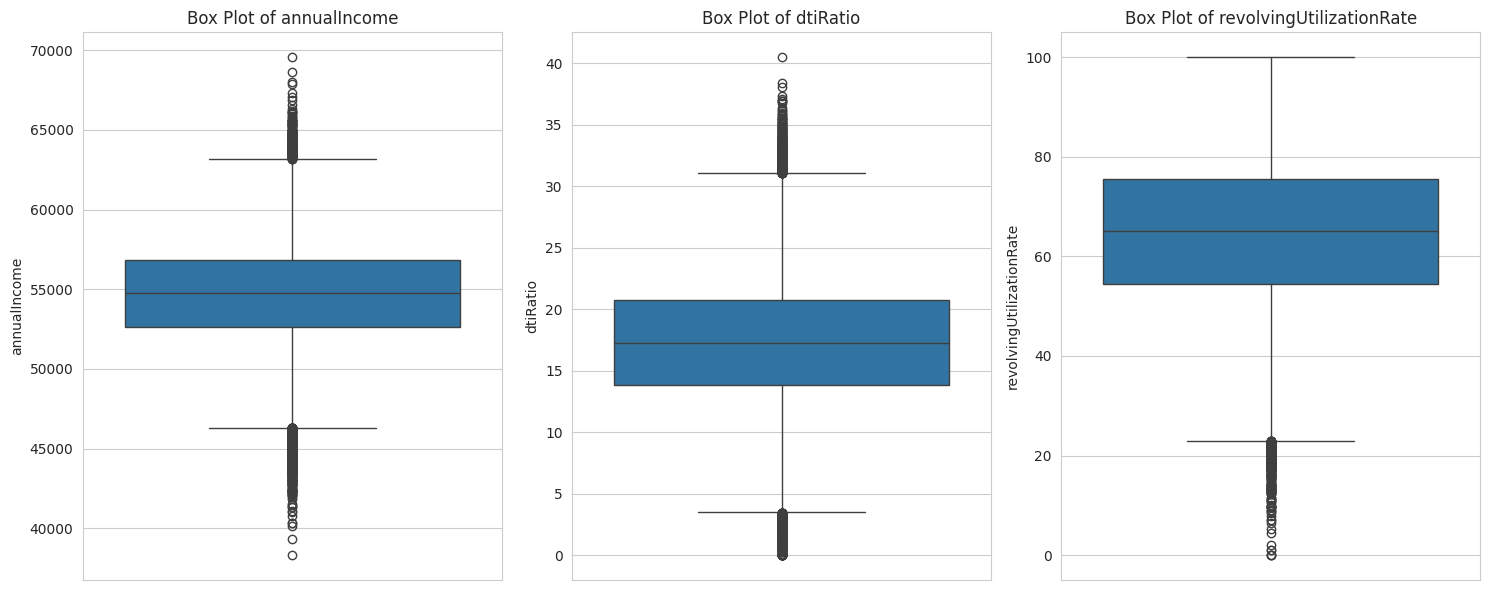

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_for_boxplots = ['annualIncome', 'dtiRatio', 'revolvingUtilizationRate']

plt.figure(figsize=(15, 6))
for i, col in enumerate(columns_for_boxplots):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

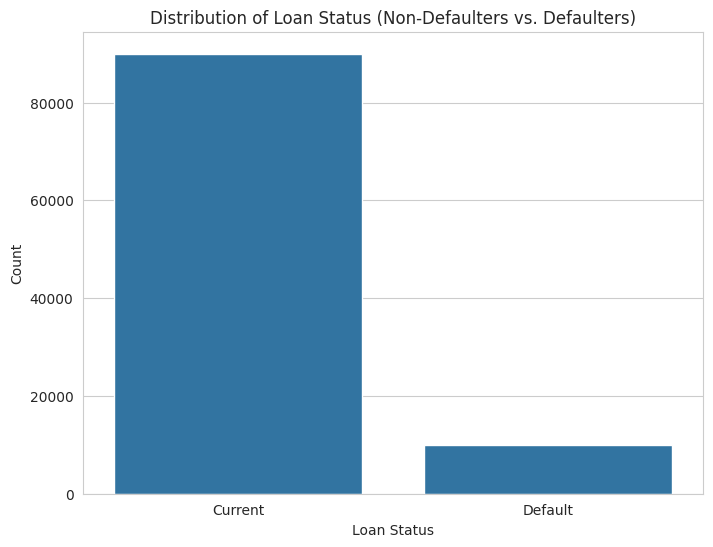

In [25]:
# Plot the distribution of loanStatus
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loanStatus', order=df['loanStatus'].value_counts().index)
plt.title('Distribution of Loan Status (Non-Defaulters vs. Defaulters)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

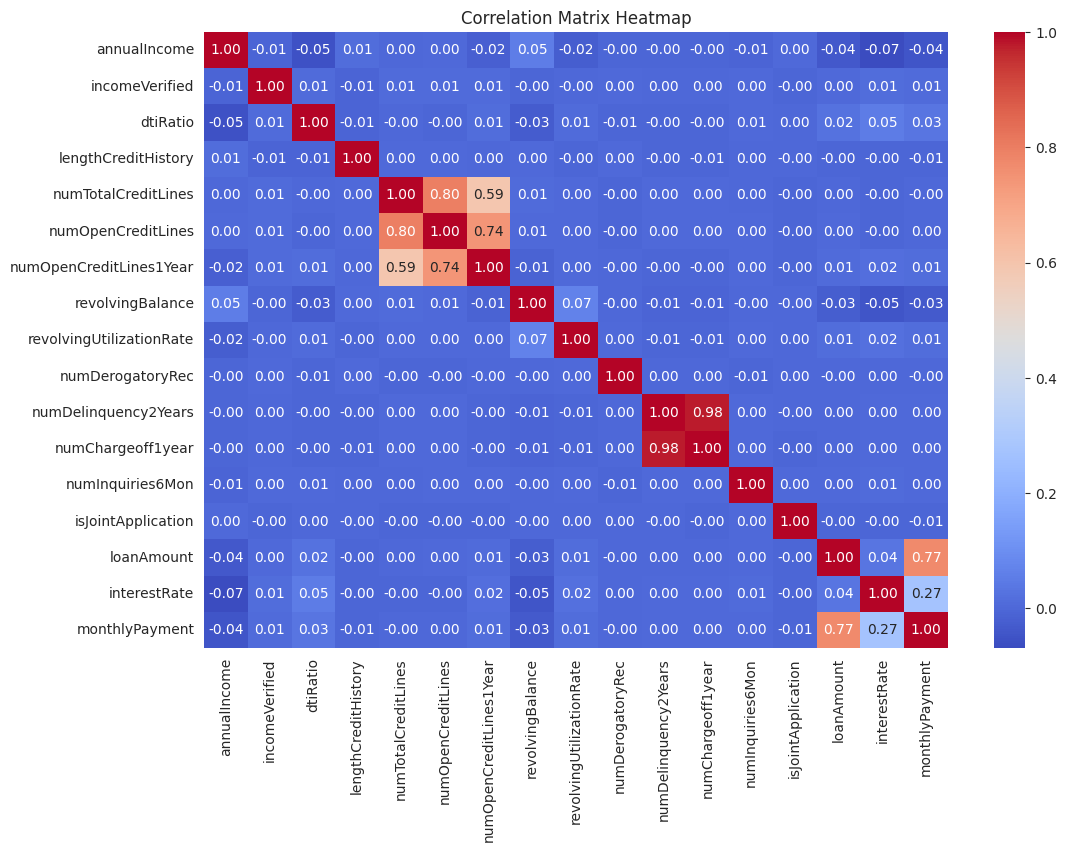

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('loanStatus', axis=1)
y = df['loanStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (80000, 24)
Shape of X_test: (20000, 24)
Shape of y_train: (80000,)
Shape of y_test: (20000,)


In [28]:
from sklearn.impute import SimpleImputer

numerical_cols_with_nulls = ['numOpenCreditLines', 'isJointApplication', 'loanAmount']
categorical_cols_with_nulls = ['term']

# Numerical imputer
num_imputer = SimpleImputer(strategy='median')
X_train[numerical_cols_with_nulls] = num_imputer.fit_transform(X_train[numerical_cols_with_nulls])
X_test[numerical_cols_with_nulls] = num_imputer.transform(X_test[numerical_cols_with_nulls])

# Categorical imputer
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols_with_nulls] = cat_imputer.fit_transform(X_train[categorical_cols_with_nulls])
X_test[categorical_cols_with_nulls] = cat_imputer.transform(X_test[categorical_cols_with_nulls])


In [29]:
df['yearsEmployment']

,yearsEmployment
0,10+ years
1,2-5 years
2,< 1 year
3,6-9 years
4,2-5 years
...,...
99995,2-5 years
99996,6-9 years
99997,1 year
99998,1 year


In [30]:
import pandas as pd

threshold = 2000

state_counts = X_train['residentialState'].value_counts()

# We create a list of the states that meet our threshold.
top_states = state_counts[state_counts >= threshold].index.tolist()

print(f"Found {len(top_states)} states with counts >= {threshold} in X_train.")
print("These will be kept:", top_states)
print("-" * 30)

print("Applying binning to X_train...")
X_train['residentialState'] = X_train['residentialState'].apply(lambda x: x if x in top_states else 'Other')

print("Applying the same binning rule to X_test...")
X_test['residentialState'] = X_test['residentialState'].apply(lambda x: x if x in top_states else 'Other')



print("\nNew category counts in X_train['residentialState']:")
print(X_train['residentialState'].value_counts())

print("\nNew category counts in X_test['residentialState']:")
print(X_test['residentialState'].value_counts())

Found 10 states with counts >= 2000 in X_train.
These will be kept: ['CA', 'FL', 'DC', 'NY', 'TX', 'WA', 'IA', 'IL', 'IN', 'ID']
------------------------------
Applying binning to X_train...
Applying the same binning rule to X_test...

New category counts in X_train['residentialState']:
residentialState
Other    45951
CA        5597
FL        5257
DC        4292
NY        4125
TX        2760
WA        2758
IA        2395
IL        2376
IN        2246
ID        2243
Name: count, dtype: int64

New category counts in X_test['residentialState']:
residentialState
Other    11390
CA        1460
FL        1346
DC        1104
NY        1036
WA         719
TX         672
ID         602
IA         580
IN         554
IL         537
Name: count, dtype: int64


In [31]:
def engineer_date_features(df):
    """Converts 'date' column to datetime and extracts features."""

    df_copy = df.copy()


    df_copy['date'] = pd.to_datetime(df_copy['date'], format='%m/%d/%Y')

    df_copy['loan_issue_year'] = df_copy['date'].dt.year
    df_copy['loan_issue_month'] = df_copy['date'].dt.month
    df_copy['loan_issue_dayofweek'] = df_copy['date'].dt.dayofweek # Monday=0, Sunday=6

    df_copy = df_copy.drop('date', axis=1)

    return df_copy

In [32]:
#  Apply the function to both X_train and X_test ---
print("Processing date features for X_train...")
X_train = engineer_date_features(X_train)

print("Processing date features for X_test...")
X_test = engineer_date_features(X_test)


print("\nNew date features created. X_train columns:")
print(X_train.columns)
print("\nFirst 5 rows with new features:")
print(X_train[['loan_issue_year', 'loan_issue_month', 'loan_issue_dayofweek']].head())

Processing date features for X_train...
Processing date features for X_test...

New date features created. X_train columns:
Index(['residentialState', 'yearsEmployment', 'homeOwnership', 'annualIncome',
       'incomeVerified', 'dtiRatio', 'lengthCreditHistory',
       'numTotalCreditLines', 'numOpenCreditLines', 'numOpenCreditLines1Year',
       'revolvingBalance', 'revolvingUtilizationRate', 'numDerogatoryRec',
       'numDelinquency2Years', 'numChargeoff1year', 'numInquiries6Mon',
       'purpose', 'isJointApplication', 'loanAmount', 'term', 'interestRate',
       'monthlyPayment', 'grade', 'loan_issue_year', 'loan_issue_month',
       'loan_issue_dayofweek'],
      dtype='object')

First 5 rows with new features:
       loan_issue_year  loan_issue_month  loan_issue_dayofweek
75220             2015                 1                     0
48955             2014                11                     2
44966             2015                 4                     6
13568             201

In [33]:

# For 'term', we can extract the number directly.
X_train['term'] = X_train['term'].str.replace(' months', '').astype(int)
X_test['term'] = X_test['term'].str.replace(' months', '').astype(int)

employment_map = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2-5 years': 3.5,
    '6-9 years': 7.5,  # Midpoint of 6 and 9
    '10+ years': 10
}
X_train['yearsEmployment'] = X_train['yearsEmployment'].map(employment_map)
X_test['yearsEmployment'] = X_test['yearsEmployment'].map(employment_map)

grade_map = {
    'A1': 0, 'A2': 1, 'A3': 2,
    'B1': 3, 'B2': 4, 'B3': 5,
    'C1': 6, 'C2': 7, 'C3': 8,
    'D1': 9, 'D2': 10, 'D3': 11,
    'E1': 12, 'E2': 13, 'E3': 14
}
X_train['grade'] = X_train['grade'].map(grade_map)
X_test['grade'] = X_test['grade'].map(grade_map)


print("Ordinal encoding complete.")
print("X_train[['term', 'yearsEmployment', 'grade']].head():")
print(X_train[['term', 'yearsEmployment', 'grade']].head())

Ordinal encoding complete.
X_train[['term', 'yearsEmployment', 'grade']].head():
       term  yearsEmployment  grade
75220    36              7.5      4
48955    60              0.5      5
44966    60              1.0     13
13568    36             10.0      3
92727    36              3.5      0


In [34]:
from sklearn.preprocessing import OneHotEncoder

# --- Step 1: Identify the nominal columns to encode ---
nominal_cols = ['homeOwnership', 'purpose', 'residentialState']

# --- Step 2: Set up and fit the encoder ---
# handle_unknown='ignore' will prevent errors if a category in test data was not in train data.
# sparse_output=False ensures the output is a standard numpy array.
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data and transform it
X_train_ohe_array = ohe.fit_transform(X_train[nominal_cols])

# Transform the test data using the FITTED encoder
X_test_ohe_array = ohe.transform(X_test[nominal_cols])

# Create new DataFrames  ---
ohe_cols = ohe.get_feature_names_out(nominal_cols)

X_train_ohe = pd.DataFrame(X_train_ohe_array, columns=ohe_cols, index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe_array, columns=ohe_cols, index=X_test.index)


# --- Step 4: Combine with the main dataframes and drop the original columns ---
# Drop the original nominal columns
X_train = X_train.drop(columns=nominal_cols)
X_test = X_test.drop(columns=nominal_cols)

# Concatenate the new one-hot encoded columns
X_train = pd.concat([X_train, X_train_ohe], axis=1)
X_test = pd.concat([X_test, X_test_ohe], axis=1)

print("\nOne-Hot Encoding complete.")
print(f"Original shape of X_train: {X_train.shape}")
print("Number of columns added:", len(ohe_cols))


One-Hot Encoding complete.
Original shape of X_train: (80000, 44)
Number of columns added: 21


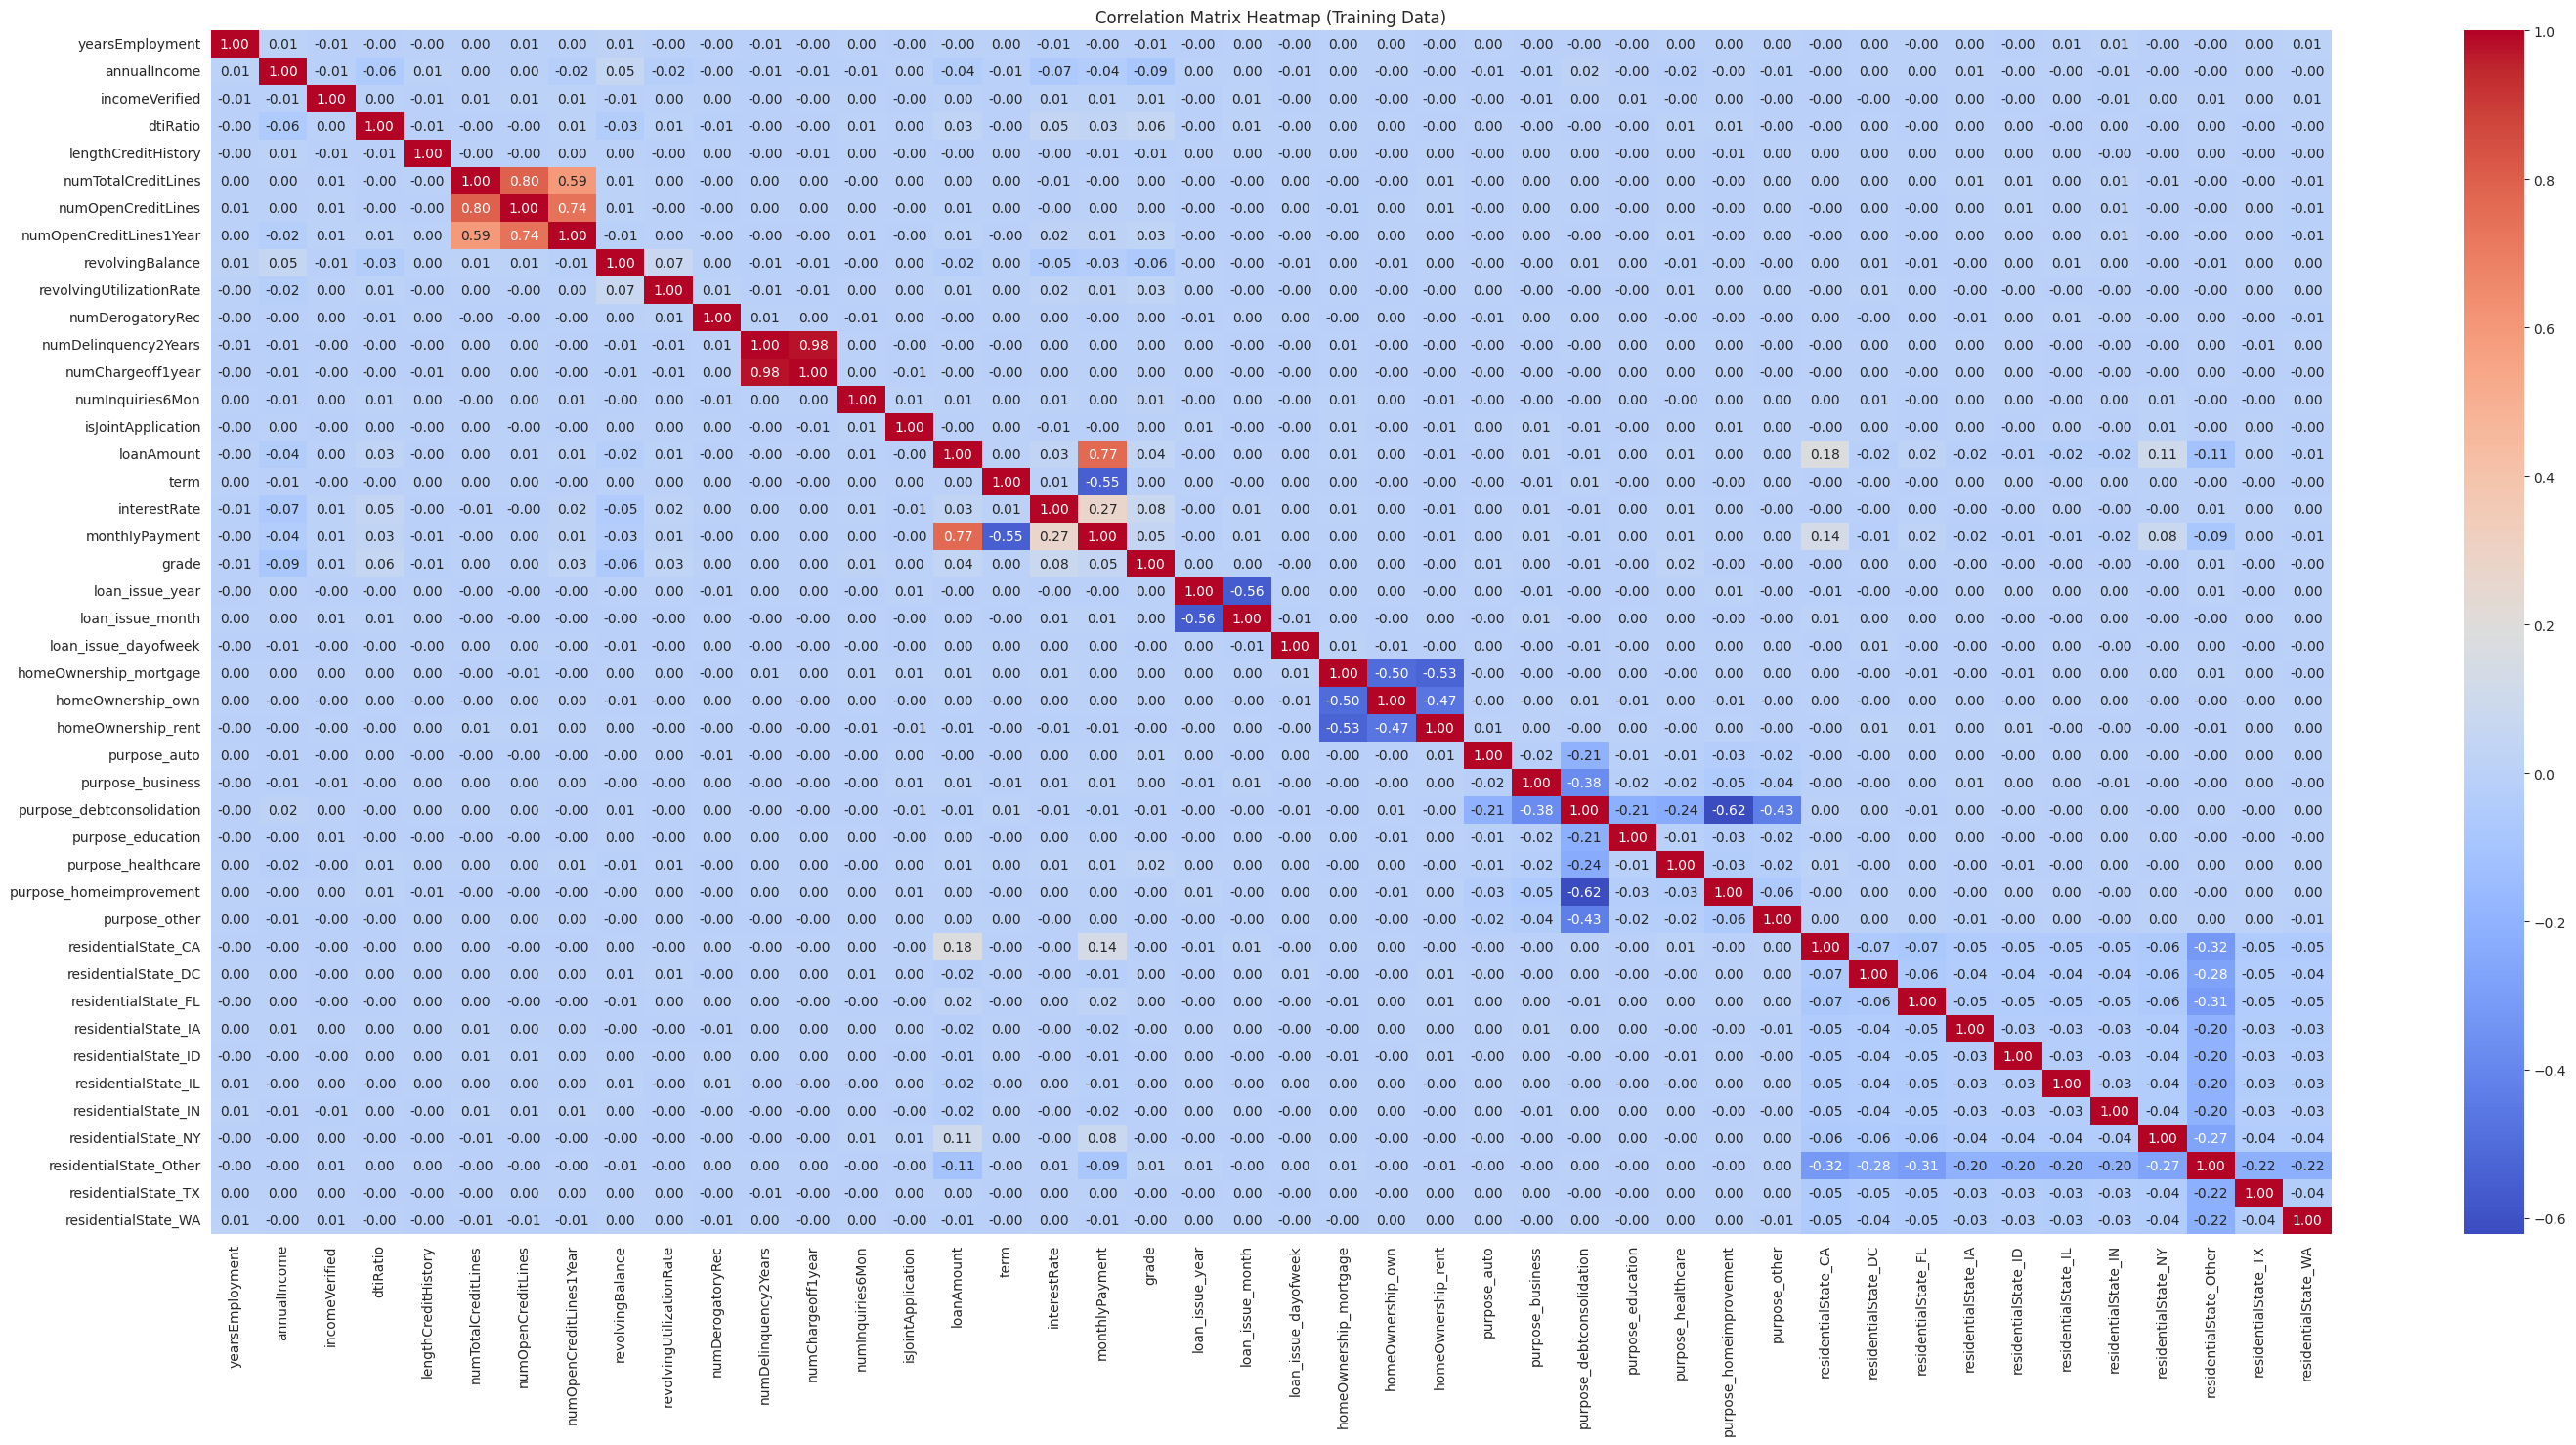

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns in X_train
correlation_matrix_train = X_train.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(35, 16))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Training Data)')
plt.show()